# Homework 2 - Machine Learning Pipeline

CAPP 30235 Machine Learning for Public Policy

Jonathan Tan

April 18, 2019

In [285]:
# Setup
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 1. Read Data

For this assignment, assume input is CSV and write a function that can read a CSV into Python. It's ok to use an existing function that already exists in Python or Pandas.

In [267]:
def read_data(csv):
    '''
    Input: CSV file
    Output: pandas DataFrame of CSV file
    '''

    return pd.read_csv(csv)

In [268]:
DATA_PATH = 'data/credit-data.csv'
df = read_data(DATA_PATH)
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


## 2. Explore Data

You can use the code you wrote for assignment 1 here to generate distributions of variables, correlations between them, find outliers, and data summaries.

In [269]:
# 1. Generate distributions of variables
def plot_distributions(df, varlist=None):
    '''
    Plots histograms for every variable. Possible to only plot a subset of
    variables by giving list of variables as a parameter.

    Inputs: df - pandas DataFrame.
            varlist - list of strings of varnames to plot. Default is all vars.
    Output: None
    Other: Plots histograms of selected variables in df.
    '''

    # Filter dataframe down by selected variables, if any.
    if varlist:
        df = df[varlist]

    categories = df.columns.tolist()

    # Set up dimensions for empty figure; fixed width, variable height.
    num_plots = len(categories)
    num_rows, NUM_COLS = (num_plots // 3) + 1, 3
    FIG_WIDTH, fig_height = 16, 4 * num_rows

    # Create empty figure.
    fig = plt.figure(figsize=(FIG_WIDTH, fig_height))
    axes = [plt.subplot(num_rows, NUM_COLS, i) for i in range(1, num_plots + 1)]
    plt.tight_layout(pad=0, w_pad=1, h_pad=3)

    # Fill figure with histograms.
    for i in range(num_plots):
        ax = axes[i]
        df[categories[i]].hist(
            ax=ax,
            grid=False)

        # Set title.
        ax.set_title(categories[i])

        # Label bars.
        for p in ax.patches:
            ax.annotate(str(p.get_height()),
                        (p.get_x(), p.get_height()))

    # Display figure.
    plt.show()

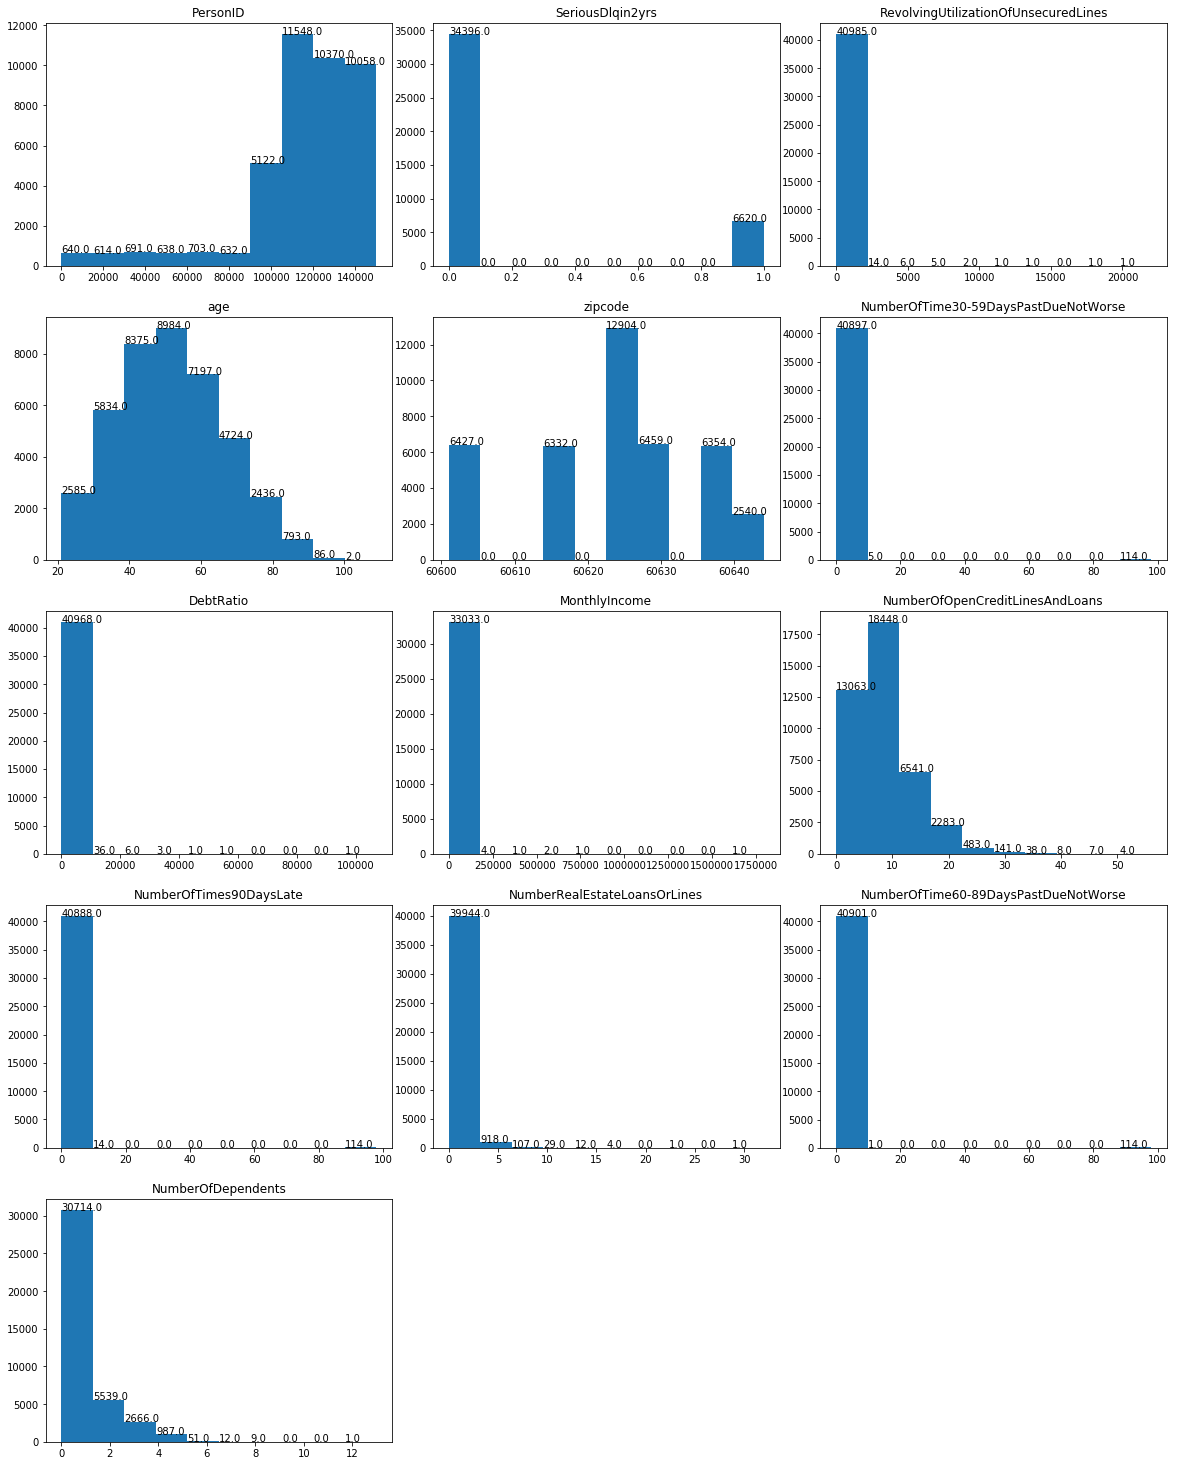

In [270]:
plot_distributions(df)

In [271]:
# 2. Find correlations between variables
# Adapted from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
def get_correlations(df, plot=False):
    '''
    Prints a correlation table between all variables in the DataFrame.
    If 'plot=True' is specified, plots the correlation matrix instead.

    Input:  df - pandas DataFrame
    Output: None
    Other:  Prints table or plots heatmap of correlations, depending on kwargs.
    '''

    if plot:
        # Setup plot
        corr = df.corr()
        fig, ax = plt.subplots(figsize=(15, 15))

        # Populate plot with matrix of correlations
        ax.matshow(corr)

        # Apply variable labels, rotate where necessary
        plt.xticks(range(len(corr.columns)), corr.columns)
        plt.yticks(range(len(corr.columns)), corr.columns)
        plt.xticks(rotation=30,
                   rotation_mode='anchor',
                   ha='left')

        # Display plot
        plt.show()
    else:
        print(df.corr())

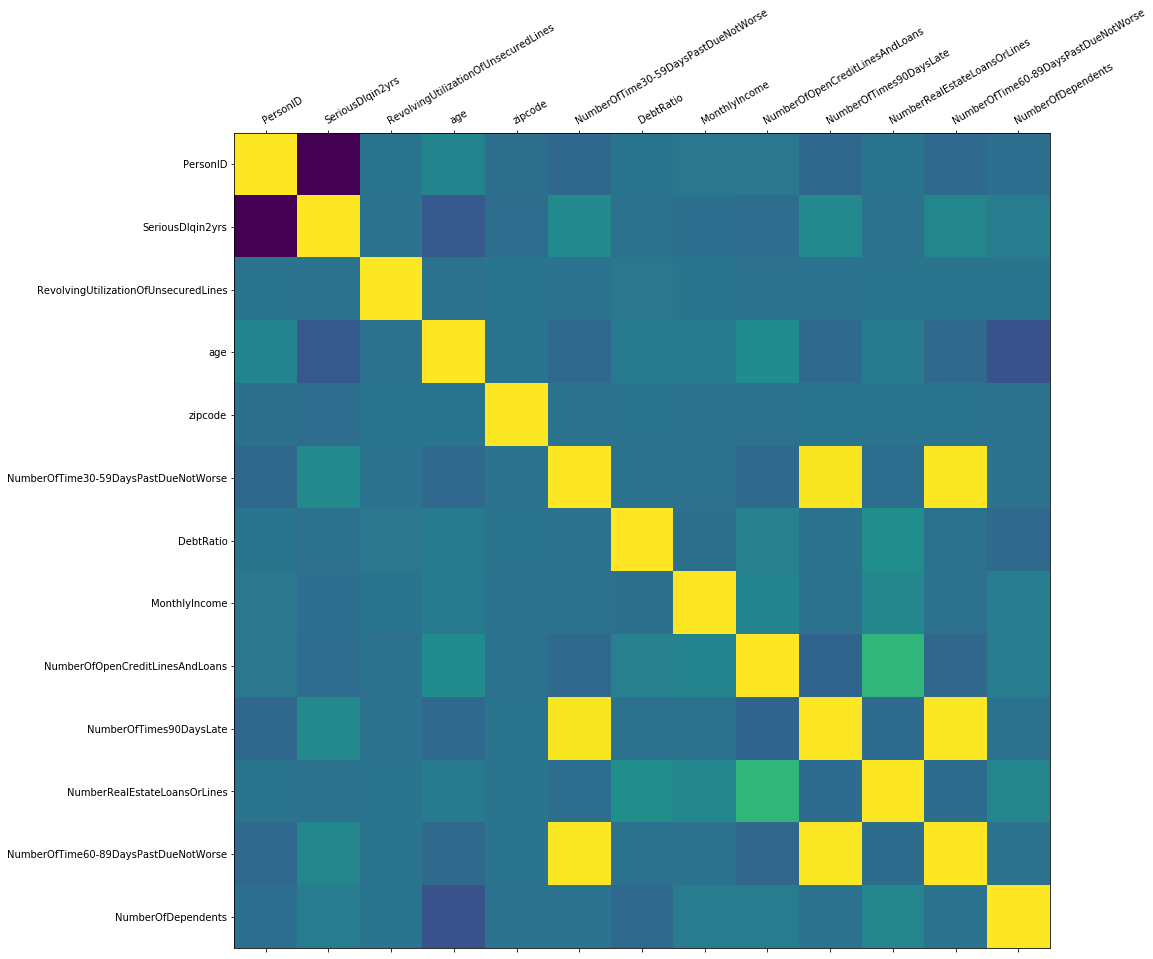

In [272]:
get_correlations(df, plot=True)

In [273]:
# 3. Find outliers in numeric variables
# 'Outlier' here is defined (if numeric) as having value of 1.5 * IQR

# TODO



In [274]:
# 4. Summarize numeric data
def describe_data(df, varlist=None):
    '''
    Wrapper for pandas describe() method; adds easy subsetting by providing
    list of variable names.

    Input: df - pandas DataFrame
    Output: df.describe() - pandas DataFrame of summaries for all numeric vars
    '''

    if varlist:
        df = df[varlist]

    return df.describe()

In [275]:
describe_data(df)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


## 3. Pre-Process Data

For this assignment, you can limit this to filling in missing values for the variables that have missing values. You can use any simple method to do it (use mean or median to fill in missing values).

In [276]:
def fill_missing(df, median=False):
    '''
    Takes a df and replaces missing values for all numeric variables with a
    function of the remaining data. Function is mean by default, but can use
    median by giving 'median=True' parameter.

    Input: df - pandas DataFrame
    Output: filled_df - pandas DataFrame with missing numeric data filled in
    '''

    if median:
        return df.fillna(df.median())
    else:
        return df.fillna(df.mean())

In [277]:
df = fill_missing(df)

## 4. Generate Features/Predictors

For this assignment, you should write one function that can discretize a continuous variable and one function that can take a categorical variable and create binary/dummy variables from it. Apply them to at least one variable each in this data.

In [278]:
# 4A. Discretize continuous variable.
def bin_continuous_var(df, var, bin_width=None, num_bins=None):
    '''
    Takes a pandas DataFrame, a string label for a continuous variable, and a
    specified bin width and/or number of bins as inputs, then creates a new
    binned variable based on the provided bin specs and returns a new DataFrame
    with the new variable.

    Inputs: df - pandas DataFrame
            var - string label of a continuous variable to discretize
            bin_width - int size of bin to discretize var by
            num_bins - int number of bins to discretize var by
    Output: new_df - pandas DataFrame with new variable named "[var]_bin"
    '''

    # Only one of bin_width and num_bins can be specified at any one time.
    if bin_width and num_bins:
        raise ValueError('bin_width and num_bins cannot both be specified. Please choose one.')
    elif not bin_width and not num_bins:
        raise ValueError('bin_width and num_bins cannot both be None. Please specify one of them.')

    # Create name for new variable
    new_var = var + '_bin'

    # Create copy of df to return; avoid implicitly modifying in place
    new_df = df.copy(deep=True)

    # Discretizing by bin_width:
    if bin_width:
        new_df[new_var] = pd.cut(new_df[var],
                                 np.arange(start=new_df[var].min(),
                                           stop=new_df[var].max(),
                                           step=bin_width))
        new_df[new_var] = new_df[new_var].astype('str')
    else: # Discretizing by num_bins:
        new_df[new_var]= pd.cut(new_df[var], num_bins)

    return new_df

In [279]:
# 4B. Make dummy variables from categorical variable:
def make_dummy_vars(df, var):
    '''
    Wrapper for the pandas get_dummies() method. Takes a pandas DataFrame and 
    a string variable label as inputs, and returns a new DataFrame with new 
    binary variables for every unique value in var.

    Inputs: df - pandas DataFrame
            var - string label for a categorical value
    Output: new_df - pandas DataFrame with new variables named "[var]_[value]"
    '''

    # Create copy of df to return; avoid implicitly modifying in place.
    new_df = df.copy(deep=True)

    # Get dummy variables
    new_df = pd.get_dummies(df, columns=[var])

    return new_df

In [280]:
# Apply them to at least one variable each in this data.

# Discretize income and/or age.
df = bin_continuous_var(df, 'age', bin_width=10)

# Make dummy variables for SeriousDlqin2yrs, zipcode.
df = make_dummy_vars(df, 'zipcode')
df = make_dummy_vars(df, 'age_bin')

## 5. Build Classifier

For this assignment, select any classifier you feel comfortable with (Logistic Regression or Decision Trees).

In [281]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,...,zipcode_60644,"age_bin_(21, 31]","age_bin_(31, 41]","age_bin_(41, 51]","age_bin_(51, 61]","age_bin_(61, 71]","age_bin_(71, 81]","age_bin_(81, 91]","age_bin_(91, 101]",age_bin_nan
0,98976,0,1.000000,55,0,505.000000,0.0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
1,98991,0,0.547745,71,0,0.459565,15666.0,7,0,2,...,0,0,0,0,0,1,0,0,0,0
2,99012,0,0.044280,51,0,0.014520,4200.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
3,99023,0,0.914249,55,4,0.794875,9052.0,12,0,3,...,0,0,0,0,1,0,0,0,0,0
4,99027,0,0.026599,45,0,0.049966,10406.0,4,0,0,...,0,0,0,1,0,0,0,0,0,0


In [287]:
# Code below adapted from
# https://github.com/dssg/MLforPublicPolicy/blob/master/labs/2018/lab3_knn_dt.ipynb

# Split data into test and training sets


# Avoid feeding Person ID into classifier
df.set_index('PersonID')

# Split data into features and labels.
features_df = df.drop(labels=['SeriousDlqin2yrs'], axis=1)
labels_df = df[['SeriousDlqin2yrs']]

# Initialize and fit decision tree classifier.
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(features_df, labels_df)

# Get predictions
accuracy_score(classifier.predict(features_df), labels_df)

1.0

array([0, 0, 0, ..., 0, 0, 0])